Customer Segmentation Using RFM Analysis



In [ ]:
# importing necessary libraries
import pandas as pd
import datetime as dt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# importing the data
df = pd.read_excel("Sales_Dataset_New.xlsx")
df.head()


,Sno,Category,City,State,Country,Customer_ID,Order_Date,Order_Priority,Product_ID,Ship_Mode,Sub_Cat,Discount,Profit,Quantity,Unit_Price,Sales_Amount
0,1,Baby Care,Los Angeles,California,United States,347,2018-04-01,Medium,TEC-PH-10003885,Standard Class,Grooming,0.2,24,4,53,212
1,2,Baby Care,Soledad Díez Gutiérrez,San Luis Potosí,Mexico,3500,2018-04-01,High,TEC-PH-10003405,Standard Class,Grooming,0.0,7,4,45,180
2,3,Baby Care,Detroit,Michigan,United States,6497,2018-04-01,High,TEC-PH-10002660,First Class,Grooming,0.0,136,8,68,544
3,4,Baby Care,San Diego,California,United States,642,2018-04-01,Medium,TEC-PH-10002398,Standard Class,Grooming,0.2,56,5,89,445
4,5,Baby Care,Amstelveen,North Holland,Netherlands,4809,2018-04-01,Medium,TEC-MA-10004897,Standard Class,School Supplies,0.5,-74,4,19,76


In [ ]:
#df.sort_values(['Customer_ID'])

In [ ]:
df_recency = df.groupby(by='Customer_ID',
						as_index=False)['Order_Date'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
df_recency.head()


,CustomerID,LastPurchaseDate,Recency
0,0,2019-09-14,533
1,1,2020-11-15,105
2,2,2019-10-06,511
3,3,2020-11-14,106
4,4,2021-01-12,47


In [ ]:
frequency_df = df.drop_duplicates().groupby(by=['Customer_ID'], as_index=False)['Order_Date'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()


,CustomerID,Frequency
0,0,9
1,1,6
2,2,3
3,3,4
4,4,4


In [ ]:
#df['Total'] = df['Sales_Amount']*df['Quantity']
monetary_df = df.groupby(by='Customer_ID', as_index=False)['Sales_Amount'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()


,CustomerID,Monetary
0,0,2091
1,1,993
2,2,184
3,3,1687
4,4,393


In [ ]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(columns='LastPurchaseDate')
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,0,533,9,2091
1,1,105,6,993
2,2,511,3,184
3,3,106,4,1687
4,4,47,4,393


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()



,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0,533,9,2091,6.029985,91.392724,91.392724
1,1,105,6,993,57.570432,60.601578,60.601578
2,2,511,3,184,6.710967,14.206662,14.206662
3,3,106,4,1687,57.213466,28.139382,28.139382
4,4,47,4,393,78.060300,28.139382,28.139382


In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
	rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)


,CustomerID,RFM_Score
0,0,3.93
1,1,3.01
2,2,0.65
3,3,1.63
4,4,1.78
5,5,3.57
6,6,2.79


In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Top Customers",
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High value Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 1.6,
							'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)


,CustomerID,RFM_Score,Customer_segment
0,0,3.93,Medium Value Customer
1,1,3.01,Medium Value Customer
2,2,0.65,Lost Customers
3,3,1.63,Low Value Customers
4,4,1.78,Low Value Customers
5,5,3.57,Medium Value Customer
6,6,2.79,Low Value Customers
7,9,4.94,Top Customers
8,11,2.90,Low Value Customers
9,12,3.99,Medium Value Customer


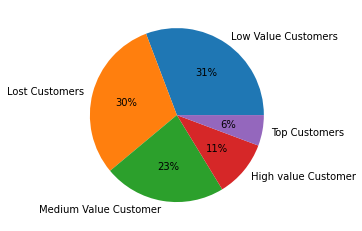

In [ ]:
import matplotlib.pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
		labels=rfm_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')
plt.show()


## CLASSIFICATION USING DECISION TREE

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
rfm_df['Customer_segment'] = labelencoder_y.fit_transform(rfm_df['Customer_segment'])

In [ ]:
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,0,533,9,2091,6.03,91.39,91.39,3.93,3
1,1,105,6,993,57.57,60.60,60.60,3.01,3
2,2,511,3,184,6.71,14.21,14.21,0.65,1
3,3,106,4,1687,57.21,28.14,28.14,1.63,2
4,4,47,4,393,78.06,28.14,28.14,1.78,2


In [ ]:
new_df=df.copy()

In [ ]:
new_df['Customer_segment']=np.nan

In [ ]:
new_df.head()

,Sno,Category,City,State,Country,Customer_ID,Order_Date,Order_Priority,Product_ID,Ship_Mode,Sub_Cat,Discount,Profit,Quantity,Unit_Price,Sales_Amount,Customer_segment
0,1,Baby Care,Los Angeles,California,United States,347,2018-04-01,Medium,TEC-PH-10003885,Standard Class,Grooming,0.2,24,4,53,212,NaN
1,2,Baby Care,Soledad Díez Gutiérrez,San Luis Potosí,Mexico,3500,2018-04-01,High,TEC-PH-10003405,Standard Class,Grooming,0.0,7,4,45,180,NaN
2,3,Baby Care,Detroit,Michigan,United States,6497,2018-04-01,High,TEC-PH-10002660,First Class,Grooming,0.0,136,8,68,544,NaN
3,4,Baby Care,San Diego,California,United States,642,2018-04-01,Medium,TEC-PH-10002398,Standard Class,Grooming,0.2,56,5,89,445,NaN
4,5,Baby Care,Amstelveen,North Holland,Netherlands,4809,2018-04-01,Medium,TEC-MA-10004897,Standard Class,School Supplies,0.5,-74,4,19,76,NaN


In [ ]:
for i in range(new_df.shape[0]):
    f=new_df.iloc[i]['Customer_ID']
    v=rfm_df.loc[rfm_df['CustomerID']==f,'Customer_segment'].item()
    new_df.at[i,'Customer_segment']=v

In [ ]:
new_df.head()

,Sno,Category,City,State,Country,Customer_ID,Order_Date,Order_Priority,Product_ID,Ship_Mode,Sub_Cat,Discount,Profit,Quantity,Unit_Price,Sales_Amount,Customer_segment
0,1,Baby Care,Los Angeles,California,United States,347,2018-04-01,Medium,TEC-PH-10003885,Standard Class,Grooming,0.2,24,4,53,212,4.0
1,2,Baby Care,Soledad Díez Gutiérrez,San Luis Potosí,Mexico,3500,2018-04-01,High,TEC-PH-10003405,Standard Class,Grooming,0.0,7,4,45,180,2.0
2,3,Baby Care,Detroit,Michigan,United States,6497,2018-04-01,High,TEC-PH-10002660,First Class,Grooming,0.0,136,8,68,544,0.0
3,4,Baby Care,San Diego,California,United States,642,2018-04-01,Medium,TEC-PH-10002398,Standard Class,Grooming,0.2,56,5,89,445,1.0
4,5,Baby Care,Amstelveen,North Holland,Netherlands,4809,2018-04-01,Medium,TEC-MA-10004897,Standard Class,School Supplies,0.5,-74,4,19,76,3.0


In [ ]:
new_df=new_df.drop(columns=['Customer_ID','Sno','City','State','Order_Date','Order_Priority','Product_ID','Ship_Mode','Sub_Cat'],axis=1)

In [ ]:
new_df.head()

,Category,Country,Discount,Profit,Quantity,Unit_Price,Sales_Amount,Customer_segment
0,Baby Care,United States,0.2,24,4,53,212,4.0
1,Baby Care,Mexico,0.0,7,4,45,180,2.0
2,Baby Care,United States,0.0,136,8,68,544,0.0
3,Baby Care,United States,0.2,56,5,89,445,1.0
4,Baby Care,Netherlands,0.5,-74,4,19,76,3.0


In [ ]:
new_df['Category'] = labelencoder_y.fit_transform(new_df['Category'])

In [ ]:
new_df['Country'] = labelencoder_y.fit_transform(new_df['Country'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51028 entries, 0 to 51027
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          51028 non-null  int64  
 1   Country           51028 non-null  int64  
 2   Discount          51028 non-null  float64
 3   Profit            51028 non-null  int64  
 4   Quantity          51028 non-null  int64  
 5   Unit_Price        51028 non-null  int64  
 6   Sales_Amount      51028 non-null  int64  
 7   Customer_segment  51028 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 3.1 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

X=new_df[['Category', 'Country','Discount', 'Sales_Amount']]
Y=new_df['Customer_segment']

ss = StandardScaler()
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify = Y)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
y_pred_dct = dct.predict(X_test)
print(f"The accuracy score for Decision Tree is {(accuracy_score(y_test,y_pred_dct)*100).round(2)} %")

The accuracy score for Decision Tree is 22.59 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"The accuracy score for Random Forest is {(accuracy_score(y_test,y_pred_rf)*100).round(2)}")

The accuracy score for Random Forest is 23.27


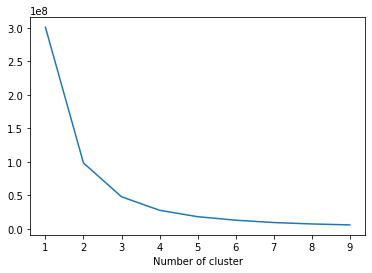

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = df_recency[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_recency[['Recency']])
df_recency['RecencyCluster'] = kmeans.predict(df_recency[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_recency = order_cluster('RecencyCluster', 'Recency',df_recency,False)

In [ ]:
df_recency.groupby('RecencyCluster')['Recency'].describe()


,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,826.0,622.104116,144.056037,455.0,509.0,579.5,696.0,1058.0
1,2729.0,287.179919,75.878821,182.0,220.0,273.0,345.0,454.0
2,5571.0,75.558787,51.753413,0.0,30.0,68.0,117.0,181.0


In [ ]:
#pip install plotly

In [ ]:
df_recency = pd.merge(df_recency, frequency_df, on='CustomerID')


In [ ]:
df_recency.head()

,CustomerID,LastPurchaseDate,Recency,RecencyCluster,Frequency
0,0,2019-09-14,533,0,9
1,2,2019-10-06,511,0,3
2,80,2018-06-01,1003,0,1
3,89,2018-09-19,893,0,2
4,94,2019-10-20,497,0,2


In [ ]:


#plot the histogram
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_recency, x=df_recency.query('Frequency < 1000')['Frequency'])
plt.figure(figsize=(10,10))
fig.show()




<Figure size 720x720 with 0 Axes>

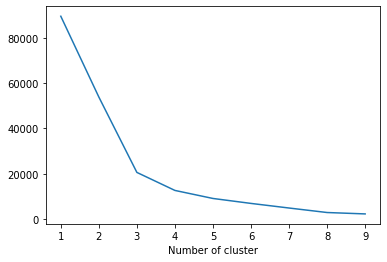

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = df_recency[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_recency[['Frequency']])
df_recency['FrequencyCluster'] = kmeans.predict(df_recency[['Frequency']])

#order the frequency cluster
df_recency = order_cluster('FrequencyCluster', 'Frequency',df_recency,True)

#see details of each cluster
df_recency.groupby('FrequencyCluster')['Frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,4853.0,3.740573,1.146375,1.0,3.0,4.0,5.0,5.0
1,4265.0,7.572333,1.620398,6.0,6.0,7.0,8.0,18.0
2,8.0,72.375000,20.729120,49.0,56.0,65.5,88.5,103.0


In [ ]:
df_recency = pd.merge(df_recency, monetary_df, on='CustomerID')

In [ ]:
#plot the histogram
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_recency, x=df_recency.query('Monetary < 1000')['Monetary'])
plt.figure(figsize=(10,10))
fig.show()

<Figure size 720x720 with 0 Axes>

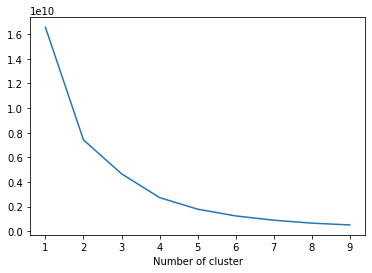

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = df_recency[['Monetary']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_recency[['Monetary']])
df_recency['MonetaryCluster'] = kmeans.predict(df_recency[['Monetary']])

#order the frequency cluster
df_recency = order_cluster('MonetaryCluster', 'Monetary',df_recency,True)

#see details of each cluster
df_recency.groupby('MonetaryCluster')['Monetary'].describe()


,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,5576.0,618.526004,350.928699,4.0,328.00,595.0,900.0,1294.0
1,2762.0,1979.988052,493.167701,1295.0,1547.00,1882.0,2362.0,3076.0
2,768.0,4192.683594,1076.086136,3081.0,3394.75,3874.5,4659.0,8710.0
3,20.0,14669.050000,5057.400440,9555.0,11209.75,11830.0,18379.0,24674.0


In [ ]:
df_recency['Grade'] = df_recency['RecencyCluster'] + df_recency['FrequencyCluster'] + df_recency['MonetaryCluster']
df_recency.groupby('Grade')['Recency','Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
Grade,,,
0,642.488710,2.722581,411.996774
1,324.533949,3.653263,624.996045
2,147.450629,4.491041,808.243995
3,118.674127,6.548791,1372.810206
4,87.044567,7.736264,2294.648962
5,68.282427,8.512552,4262.598326
6,75.333333,13.000000,12897.666667
7,10.285714,75.714286,18330.714286


In [ ]:

df_recency['Decision'] = 'No offers'


In [ ]:
df_recency.loc[df_recency['Grade']>=3,'Decision'] = 'Offers and Coupons' 
df_recency.loc[df_recency['Grade']==7,'Decision'] = 'Gift-hampers' 

In [ ]:
df_recency

,CustomerID,LastPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,Grade,Decision
0,0,2019-09-14,533,0,9,1,2091,1,2,No offers
1,368,2019-09-12,535,0,7,1,2410,1,2,No offers
2,442,2019-09-24,523,0,6,1,1893,1,2,No offers
3,1127,2019-11-02,484,0,7,1,2177,1,2,No offers
4,1222,2019-09-16,531,0,6,1,1299,1,2,No offers
...,...,...,...,...,...,...,...,...,...,...
9121,347,2021-02-14,14,2,85,2,19606,3,7,Gift-hampers
9122,484,2021-02-25,3,2,62,2,21950,3,7,Gift-hampers
9123,599,2021-02-22,6,2,69,2,17970,3,7,Gift-hampers
9124,687,2021-02-23,5,2,56,2,12166,3,7,Gift-hampers


In [ ]:
df_recency['Decision'].value_counts()

No offers             4760
Offers and Coupons    4359
Gift-hampers             7
Name: Decision, dtype: int64